### Load required libraries and datasets

In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
uploaded1 = files.upload()

Saving QVI_transaction_data.xlsx to QVI_transaction_data (1).xlsx


In [ ]:
TransactionData=pd.read_excel("QVI_transaction_data.xlsx")

In [ ]:
TransactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Exploratory Data Analysis-

##### The first step in any analysis is to first understand the data. Let’s take a look at each of the datasets provided.


In [ ]:
print(f'there are {TransactionData.shape[0]} rows and {TransactionData.shape[1]} columns')

there are 264836 rows and 8 columns


#### Examining transaction data


#### Let's check if columns we would expect to be numeric are in numeric form and date columns are in date format.


In [ ]:
TransactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


##### We can see that the date column is in an integer format. Let’s change this to a date format.


In [ ]:
TransactionData['DATE'] = pd.to_datetime(TransactionData['DATE'], origin='1899-12-30', unit='D')
TransactionData['DATE']

,DATE
0,2018-10-17
1,2019-05-14
2,2019-05-20
3,2018-08-17
4,2018-08-18
...,...
264831,2019-03-09
264832,2018-08-13
264833,2018-11-06
264834,2018-12-27


In [ ]:
TransactionData['LYLTY_CARD_NBR']=TransactionData['LYLTY_CARD_NBR'].astype('str')

In [ ]:
TransactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  object        
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 16.2+ MB


##### Summary of PROD_NAME

##### We should check that we are looking at the right products by examining PROD_NAME.


In [ ]:
TransactionData['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [ ]:
TransactionData['PROD_NAME'].value_counts()

,count
PROD_NAME,
Kettle Mozzarella Basil & Pesto 175g,3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
Tyrrells Crisps Ched & Chives 165g,3268
Cobs Popd Sea Salt Chips 110g,3265
...,...
RRD Pc Sea Salt 165g,1431
Woolworths Medium Salsa 300g,1430
NCC Sour Cream & Garden Chives 175g,1419


##### We should check that we are looking at the right products by examining PROD_NAME.


In [ ]:
TransactionData[TransactionData['PROD_NAME'].str.lower().str.contains('chips')]  # Rows with 'chips'


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
14,2019-05-15,19,19272,16686,44,Thins Chips Light& Tangy 175g,1,3.3
33,2019-05-18,45,45220,41651,22,Thins Chips Originl saltd 175g,1,3.3
...,...,...,...,...,...,...,...,...
264809,2018-08-24,271,271051,268506,47,Doritos Corn Chips Original 170g,2,8.8
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6


In [ ]:
# Check if any keyword appears in the product name
chip_keywords = ['chip', 'chips', 'crinkle', 'kettle', 'dorito', 'twisties', 'thinly', 'corn chp', 'doritos']

mask = TransactionData['PROD_NAME'].str.lower().apply(lambda x: any(word in x for word in chip_keywords))

# Get all rows that are likely chips
chips_df = TransactionData[mask]
chips_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
...,...,...,...,...,...,...,...,...
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8


In [ ]:
#Count how many total products are classified as chips
print(f"{chips_df.shape[0]} out of {TransactionData.shape[0]} products are likely chips.")


155413 out of 264836 products are likely chips.


##### As we are only interested in words that will tell us if the product is chips or not, let’s remove all words with
digits and special characters such as ‘&’ from our set of product words.

In [ ]:
# Removing digits
TransactionData['CLEANED_PROD_NAME']=TransactionData['PROD_NAME'].str.replace(r'\s*\d+\s*gm?|\s*\d+g','', regex=True)

#### Removing special characters
TransactionData['CLEANED_PROD_NAME']=TransactionData['CLEANED_PROD_NAME'].str.replace(r'(?<=\w)&(?=\w)|/','', regex=True)

In [ ]:
#Also remove extra spaces

TransactionData['CLEANED_PROD_NAME']=TransactionData['CLEANED_PROD_NAME'].str.replace(r'\s+', ' ', regex=True).str.strip()


In [ ]:
# Cleaned Product Name Column
TransactionData['CLEANED_PROD_NAME'].unique()

array(['Natural Chip Compny SeaSalt', 'CCs Nacho Cheese',
       'Smiths Crinkle Cut Chips Chicken',
       'Smiths Chip Thinly SCreamOnion',
       'Kettle Tortilla ChpsHnyJlpno Chili',
       'Old El Paso Salsa Dip Tomato Mild',
       'Smiths Crinkle Chips Salt & Vinegar', 'Grain Waves Sweet Chilli',
       'Doritos Corn Chip Mexican Jalapeno',
       'Grain Waves Sour CreamChives 210G',
       'Kettle Sensations Siracha Lime', 'Twisties Cheese',
       'WW Crinkle Cut Chicken', 'Thins Chips Light& Tangy',
       'CCs Original', 'Burger Rings', 'NCC Sour Cream & Garden Chives',
       'Doritos Corn Chip Southern Chicken', 'Cheezels Cheese Box',
       'Smiths Crinkle Original', 'Infzns Crn Crnchers Tangy Gcamole',
       'Kettle Sea Salt And Vinegar', 'Smiths Chip Thinly Cut Original',
       'Kettle Original', 'Red Rock Deli Thai ChilliLime',
       'Pringles Sthrn FriedChicken', 'Pringles SweetSpcy BBQ',
       'Red Rock Deli SR Salsa & Mzzrlla', 'Thins Chips Originl saltd',
     

#### Finding the most common word

In [ ]:
#### Let's look at the most common words by counting the number of times a word appears and
#### sorting them by this frequency in order of highest to lowest frequency

words=TransactionData['CLEANED_PROD_NAME'].str.lower().str.split().explode()

# Count word frequencies
word_counts=Counter(words)
common_words=pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
common_words

,Word,Frequency
10,chips,49770
14,kettle,41288
26,&,35565
7,smiths,28860
25,salt,27976
...,...,...
184,whlegrn,1432
196,pc,1431
52,garden,1419
50,ncc,1419


#### Remove salsa products

##### There are salsa products in the dataset but we are only interested in the chips category, so let’s remove these.

In [ ]:
TransactionData=TransactionData[~TransactionData['CLEANED_PROD_NAME'].str.contains('salsa', case=True, na=False)]

#### Summarise the data to check for nulls and possible outliers

In [ ]:
TransactionData.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
CLEANED_PROD_NAME,0


In [ ]:
TransactionData.describe()

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,7.813303e+04,32.826638,0.643654,3.083226


`There are no nulls in the columns but product quantity appears to have an outlier which we should investigate
further. Let’s investigate further the case where 200 packets of chips are bought in one transaction.`

#### Finding outlier in Product Quantity Column

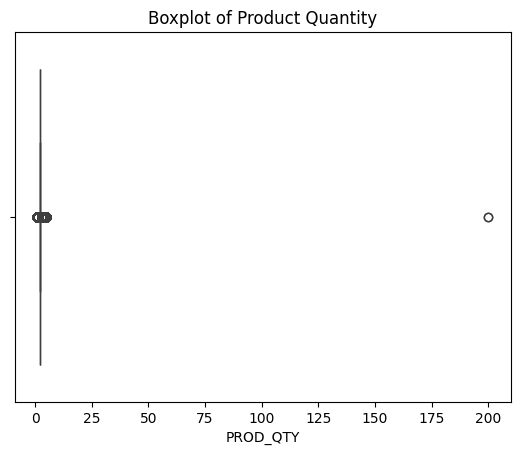

In [ ]:
sns.boxplot(x=TransactionData['PROD_QTY'])
plt.title('Boxplot of Product Quantity')
plt.show()

In [ ]:
#### Filter the dataset to find the outlier
outliers = TransactionData[TransactionData['PROD_QTY'] > 10]
outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEANED_PROD_NAME
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme


`WE FOUND THAT BOTH TRANSACTION DONE BY THE SAME CUSTOMER`

#### Let's see if the customer has had other transactions


In [ ]:
TransactionData[TransactionData['LYLTY_CARD_NBR']=='226000']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEANED_PROD_NAME
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme


`It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We’ll remove this loyalty card number from further analysis.`

##### Filter out the customer based on the loyalty card number




In [ ]:
TransactionData=TransactionData[TransactionData['LYLTY_CARD_NBR']!='226000']



#### Now Seeing the Quantity Column if there are still any outliers or not


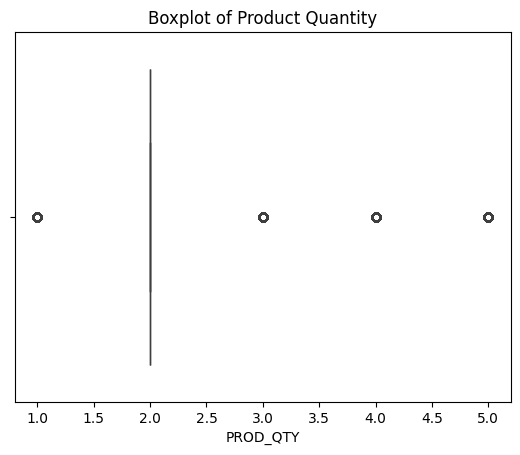

In [ ]:
sns.boxplot(x=TransactionData['PROD_QTY'])
plt.title('Boxplot of Product Quantity')
plt.show()

#### Re-examine transaction data


In [ ]:
TransactionData.describe()

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292938240,135.079423,1.351576e+05,56.583554,1.905813,7.299346
min,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,6.760050e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.351365e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.026998e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.784063,7.813292e+04,32.826444,0.343436,2.527241


`That’s better. Now, let’s look at the number of transaction lines over time to see if there are any obvious data
issues such as missing data`

#### Count the number of transactions by date


In [ ]:
transaction_counts = TransactionData.groupby('DATE').size().reset_index(name='Transaction Count')
transaction_counts

,DATE,Transaction Count
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


`There’s only 364 rows, meaning only 364 dates which indicates a missing date. Let’s create a sequence of
dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to
find the missing date.`

#### Create a sequence of dates and join this the count of transactions by date


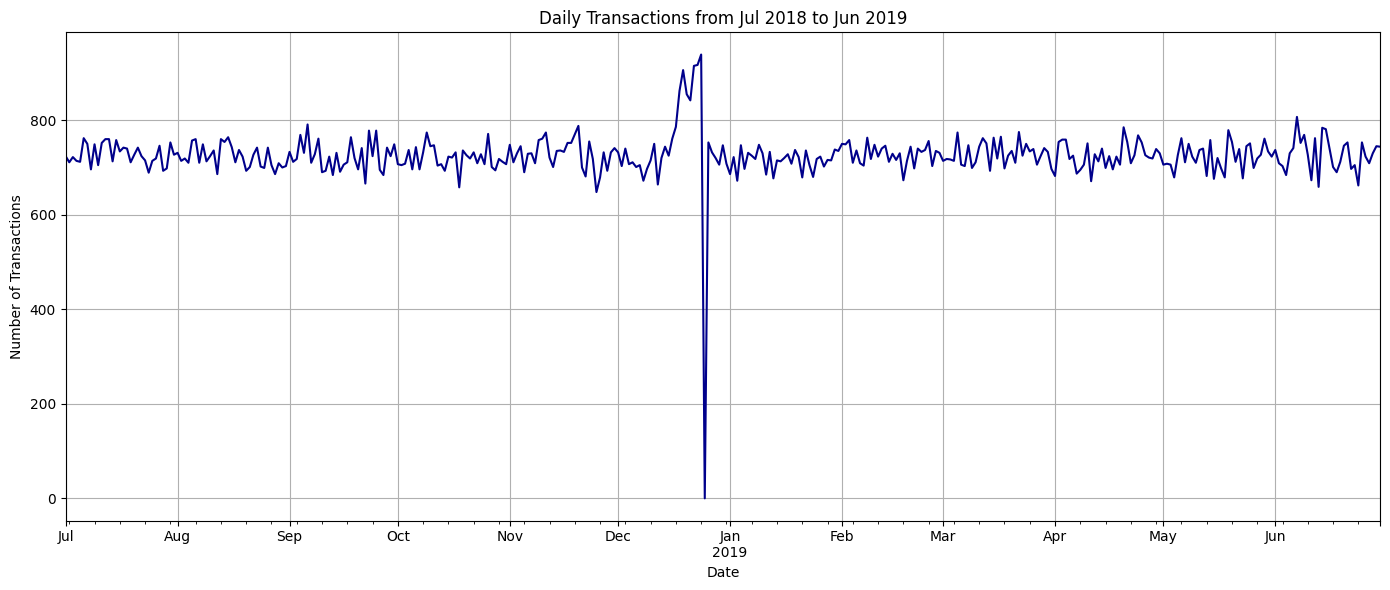

In [ ]:

# Create a complete daily date range
full_date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

# Count transactions by date
daily_txn = TransactionData.groupby('DATE').size().rename('Transaction_Count')

# Reindex to fill missing dates with 0 transactions
daily_txn = daily_txn.reindex(full_date_range, fill_value=0)
daily_txn.index.name = 'DATE'

# Plot transactions over time
plt.figure(figsize=(14, 6))
daily_txn.plot(color='darkblue')
plt.title('Daily Transactions from Jul 2018 to Jun 2019')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

# We can see that there is an increase in purchases in December and a break in late December. Let’s zoom in on this.

#### Filter to December and look at individual days


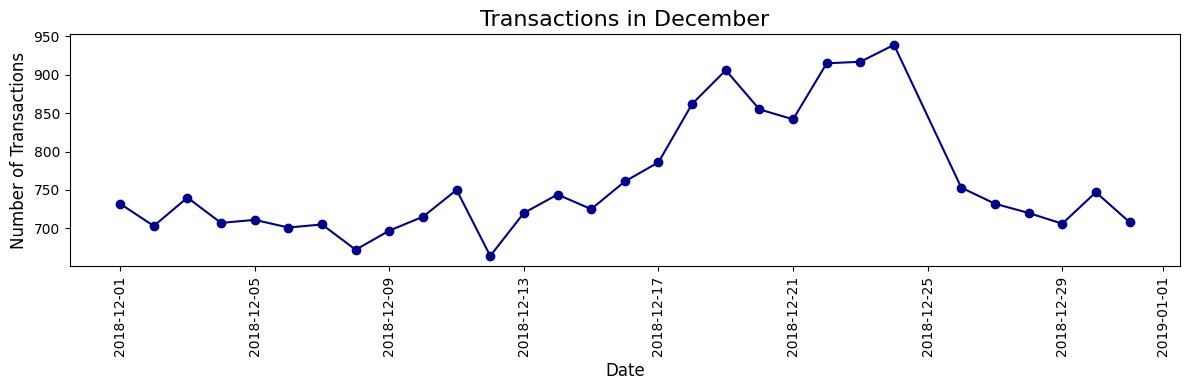

In [ ]:

import matplotlib.dates as mdates
# Filter data to only December
december_df=TransactionData[TransactionData['DATE'].dt.month == 12]

# Count transaction per day
daily_txn = december_df.groupby('DATE').size().rename('Transaction_Count')

# Plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(daily_txn.index, daily_txn.values, color='darkblue', marker='o')

# Set labels and title
ax.set_title("Transactions in December", fontsize=16, ha='center')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Transactions", fontsize=12)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

`We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.
Now that we are satisfied that the data no longer has outliers, we can move on to creating other features
such as brand of chips or pack size from PROD_NAME. We will start with pack size.`

#### Creating Column Named Pack size


In [ ]:
TransactionData['PACK_SIZE']=TransactionData['PROD_NAME'].str.extract(r'\s*(\d+)\s*(?:g|gm|G)|\s*\d+g', expand=False)

# Convert to numeric type
TransactionData['PACK_SIZE'] = pd.to_numeric(TransactionData['PACK_SIZE'])
TransactionData.groupby('PACK_SIZE').size()

# Let's check if the pack sizes look sensible

,0
PACK_SIZE,
70,1507
90,3008
110,22387
125,1454
134,25102
135,3257
150,43131
160,2970
165,15297


`The largest size is 380g and the smallest size is 70g - seems sensible!`

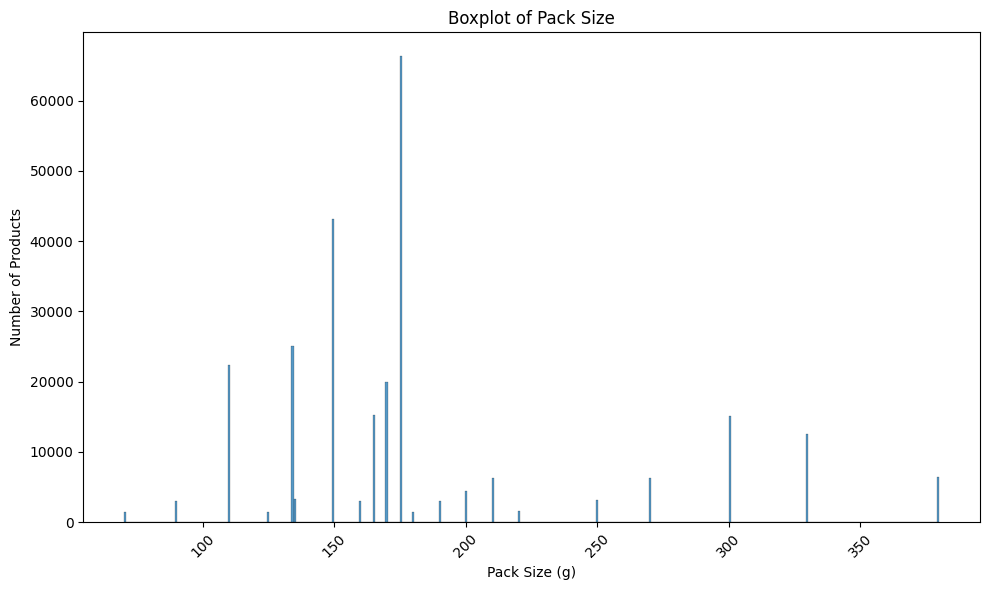

In [ ]:
# Convert to int for clearer labels if needed
TransactionData['PACK_SIZE'] = TransactionData['PACK_SIZE'].astype(int)
plt.figure(figsize=(10, 6))
sns.histplot(data=TransactionData, x='PACK_SIZE')

plt.title('Boxplot of Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Pack sizes created look reasonable and now to create brands, we can use the first word in PROD_NAME to
work out the brand name`


#### Creating Brands

In [ ]:
TransactionData['CLEANED_PROD_NAME']

,CLEANED_PROD_NAME
0,Natural Chip Compny SeaSalt
1,CCs Nacho Cheese
2,Smiths Crinkle Cut Chips Chicken
3,Smiths Chip Thinly SCreamOnion
4,Kettle Tortilla ChpsHnyJlpno Chili
...,...
264831,Kettle Sweet Chilli And Sour Cream
264832,Tostitos Splash Of Lime
264833,Doritos Mexicana
264834,Doritos Corn Chip Mexican Jalapeno


In [ ]:

TransactionData['BRAND']=TransactionData['PROD_NAME'].str.extract(r'^(\w+)')
TransactionData['BRAND']

,BRAND
0,Natural
1,CCs
2,Smiths
3,Smiths
4,Kettle
...,...
264831,Kettle
264832,Tostitos
264833,Doritos
264834,Doritos


In [ ]:
#Checking brands
TransactionData.groupby(TransactionData['BRAND']).size().sort_values(ascending=False)

,0
BRAND,
Kettle,41288
Smiths,28860
Pringles,25102
Doritos,24962
Thins,14075
RRD,11894
Infuzions,11057
WW,10320
Cobs,9693


`Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red
Rock Deli chips. Let’s combine these together.`

#### Clean brand names


In [ ]:
# Step 1: Define mapping
brand_mapping ={
    r'(?i)^Red\b': 'RRD',     # (?i) = case-insensitive
    r'(?i)^Snbts\b': 'Sunbites',
    r'(?i)^Infzns\b': 'Infuzions',
    r'(?i)^WW\b': 'Woolworths',
    r'(?i)^Smith\b': 'Smiths',
    r'(?i)^Dorito\b': 'Doritos',
    r'(?i)^Grain\b': 'GrnWves'

}

for pattern, replacement in brand_mapping.items():
    TransactionData['BRAND'] = TransactionData['BRAND'].str.replace(pattern, replacement, regex=True)

In [ ]:
TransactionData.groupby(TransactionData['BRAND']).size().sort_values(ascending=False)

# Check again

,0
BRAND,
Kettle,41288
Smiths,31823
Doritos,28145
Pringles,25102
RRD,17779
Woolworths,14757
Infuzions,14201
Thins,14075
Cobs,9693


`Now that we are happy with the transaction dataset, let’s have a look at the customer dataset.`


### Examining customer data


In [ ]:
uploaded2 = files.upload()

Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour.csv


In [ ]:
CustomerData = pd.read_csv("QVI_purchase_behaviour.csv")
CustomerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
print(f'There are total {CustomerData.shape[0]} Rows and {CustomerData.shape[1]} Columns')

There are total 72637 Rows and 3 Columns


In [ ]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
CustomerData['LYLTY_CARD_NBR']=CustomerData['LYLTY_CARD_NBR'].astype('str')

In [ ]:
print(CustomerData.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


#### Examining the values of lifestage and premium_customer


#### Distribution of LifeStage



In [ ]:
CustomerData.groupby('LIFESTAGE').size().sort_values(ascending=False)

,0
LIFESTAGE,
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


In [ ]:
CustomerData.groupby('PREMIUM_CUSTOMER').size().sort_values(ascending=False)

,0
PREMIUM_CUSTOMER,
Mainstream,29245
Budget,24470
Premium,18922


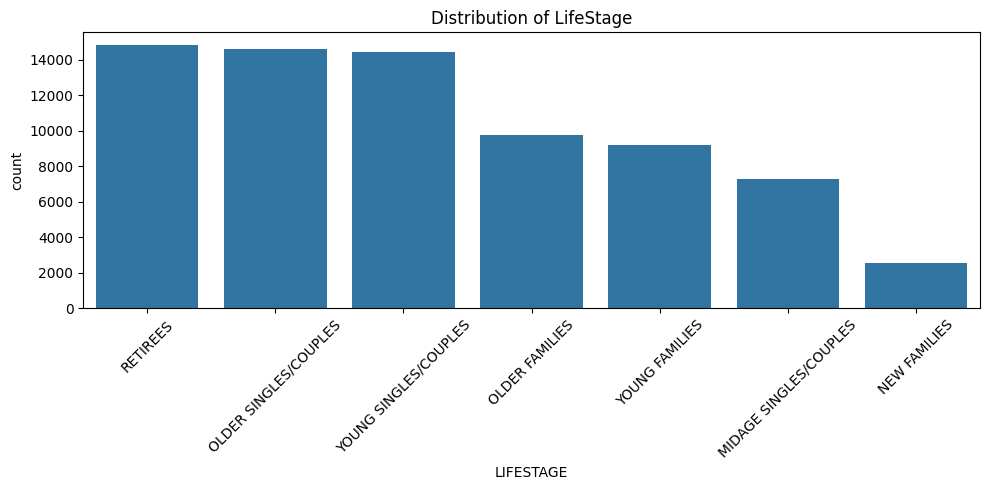

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=CustomerData, x='LIFESTAGE', order=CustomerData['LIFESTAGE'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of LifeStage")
plt.tight_layout()
plt.show()

#### Distribution of Premium Customer

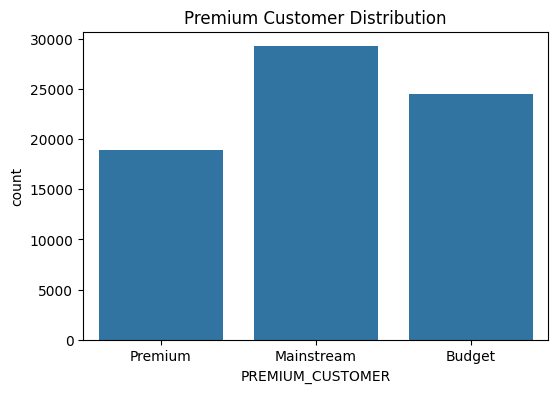

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=CustomerData, x='PREMIUM_CUSTOMER')
plt.title("Premium Customer Distribution")
plt.show()

`As there do not seem to be any issues with the customer data, we can now go ahead and join the transaction
and customer data sets together`

#### Number of Unique Customers

In [ ]:
print(f'There are total {TransactionData["LYLTY_CARD_NBR"].nunique()} unique customers')

There are total 72636 unique customers


In [ ]:
print(f'There are total {CustomerData["LYLTY_CARD_NBR"].nunique()} unique customers')

There are total 72637 unique customers


#### Merge transaction data to customer data

In [ ]:
Data=TransactionData.merge(CustomerData, how='left', on='LYLTY_CARD_NBR')
Data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEANED_PROD_NAME,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


`As the number of rows in data is the same as that of transactionData, we can be sure that no duplicates
were created. This is because we created data by using Left Join
means take all the rows in transactionData and find rows with matching values in shared columns and
then joining the details in these rows to the x or the first mentioned table.
Let’s also check if some customers were not matched on by checking for nulls.`

In [ ]:
print(f'There are {Data.shape[0]} Rows and {Data.shape[1]} Columns')

There are 264834 Rows and 13 Columns


In [ ]:
print(Data['LIFESTAGE'].isnull().sum())

0


In [ ]:
print(Data['PREMIUM_CUSTOMER'].isnull().sum())

0


`Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer
dataset.`


In [ ]:
Data.to_csv('"QVI_data.csv') # Data Exploration Complete!!!!


## Data analysis on customer segments


#### Total sales by LIFESTAGE and PREMIUM_CUSTOMER


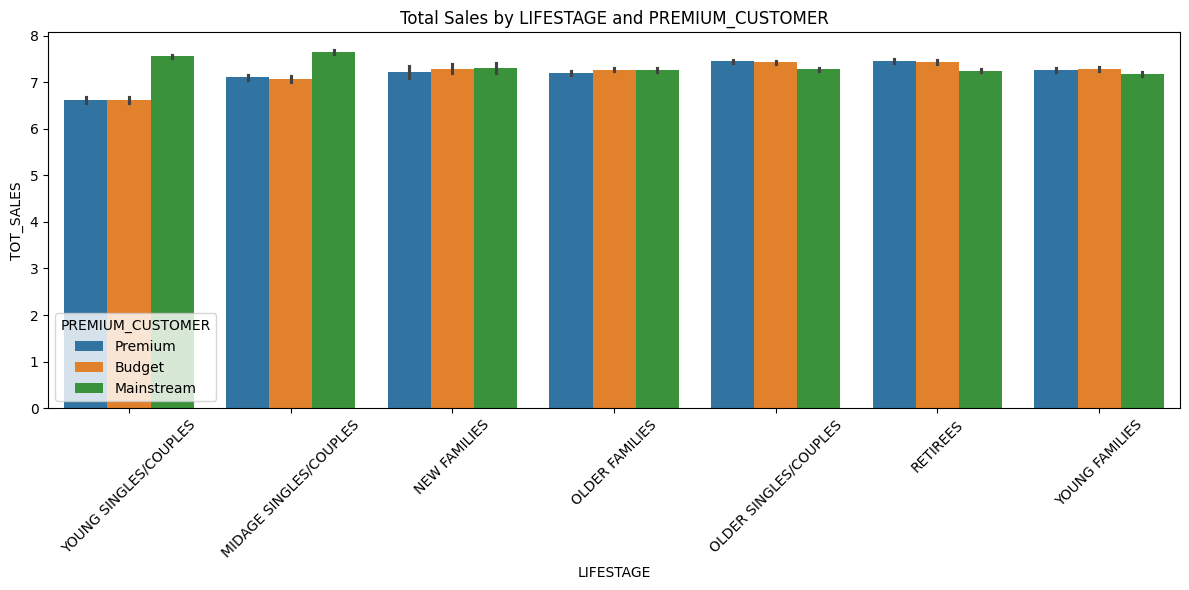

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES',hue='PREMIUM_CUSTOMER', data=Data)
plt.xticks(rotation=45)
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()


`Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream
retirees
Let’s see if the higher sales are due to there being more customers who buy chips.`



#### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER


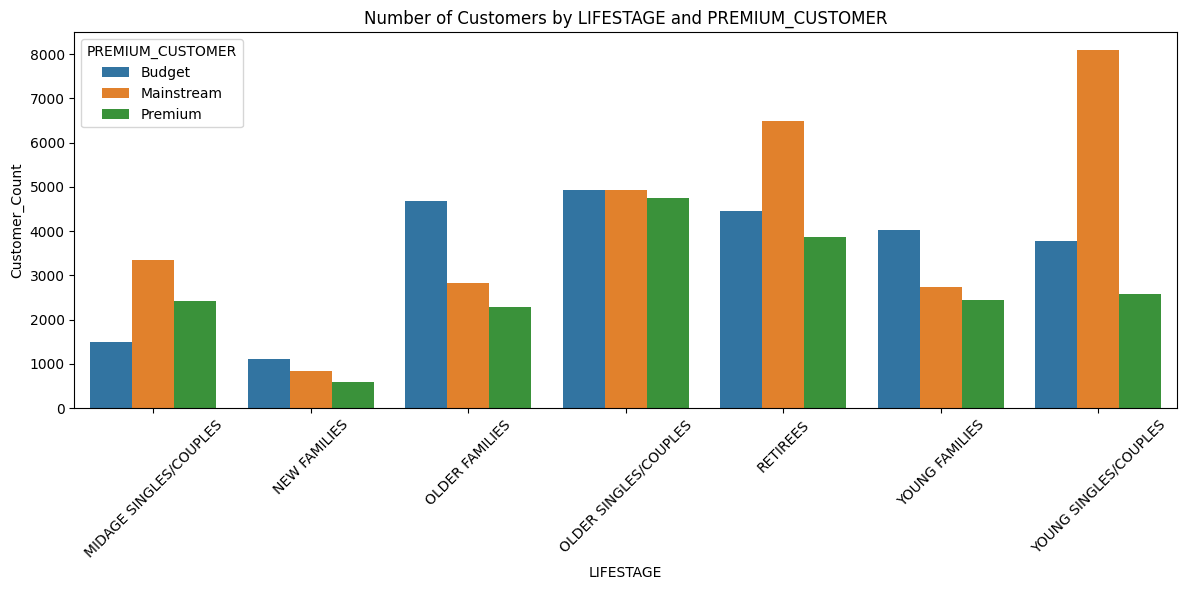

In [ ]:
Customer_Counts=Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

Customer_Counts.rename(columns={'LYLTY_CARD_NBR': 'Customer_Count'}, inplace=True)
Customer_Counts.sort_values(by='Customer_Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='Customer_Count', hue='PREMIUM_CUSTOMER', data=Customer_Counts)
plt.xticks(rotation=45)
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

# There are more Mainstream - young singles/couples and Mainstream - retirees who buy
# chips. This contributes to there being more sales to these customer segments but
# this is not a major driver for the Budget - Older families segment.
# Higher sales may also be driven by more units of chips being bought per customer.
# Let's have a look at this next.

`There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget
 Older families segment.
Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this
next.`

#### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER


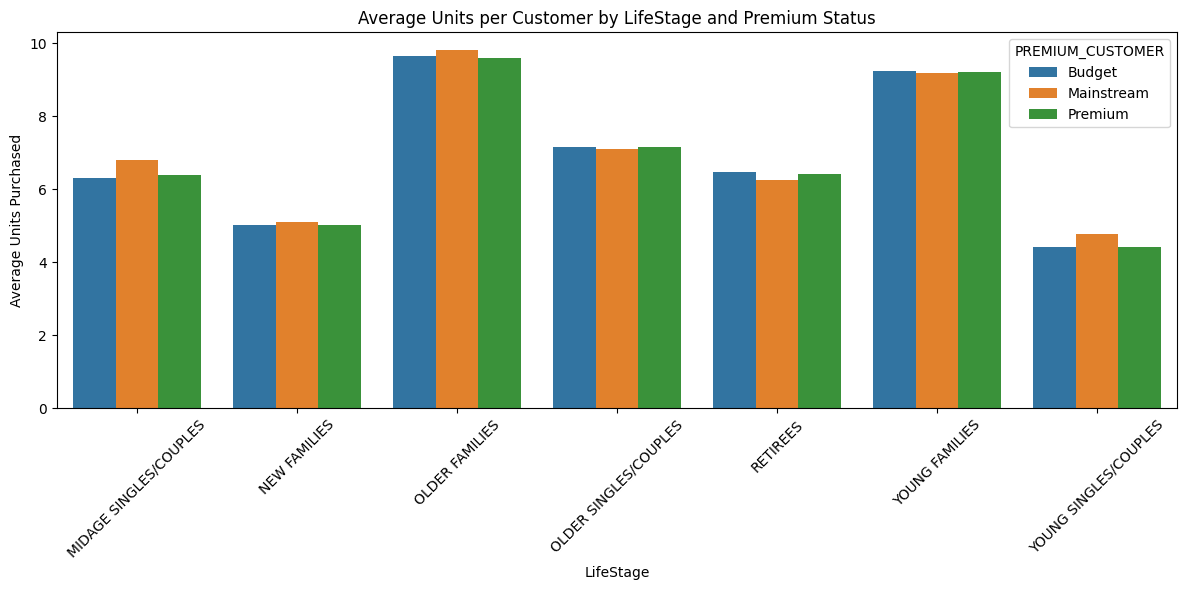

In [ ]:
# Total Unit per customer
unit_per_customer=Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER','LYLTY_CARD_NBR'])['PROD_QTY'].sum().reset_index()

# Average units per customer by LifeStage and Premium status
avg_units=unit_per_customer.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()
avg_units.rename(columns={'PROD_QTY': 'Avg_Units_Per_Customer'}, inplace=True)
avg_units.sort_values(ascending=False, by='Avg_Units_Per_Customer')




plt.figure(figsize=(12,6))
sns.barplot(data=avg_units, x='LIFESTAGE', y='Avg_Units_Per_Customer', hue='PREMIUM_CUSTOMER')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.title('Average Units per Customer by LifeStage and Premium Status')
plt.ylabel('Average Units Purchased')
plt.xlabel('LifeStage')
plt.tight_layout()
plt.show()

# Older families and young families in general buy more chips per customer


`Older families and young families in general buy more chips per customer
Let’s also investigate the average price per unit chips bought for each customer segment as this is also a
driver of total sales.`

#### Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER


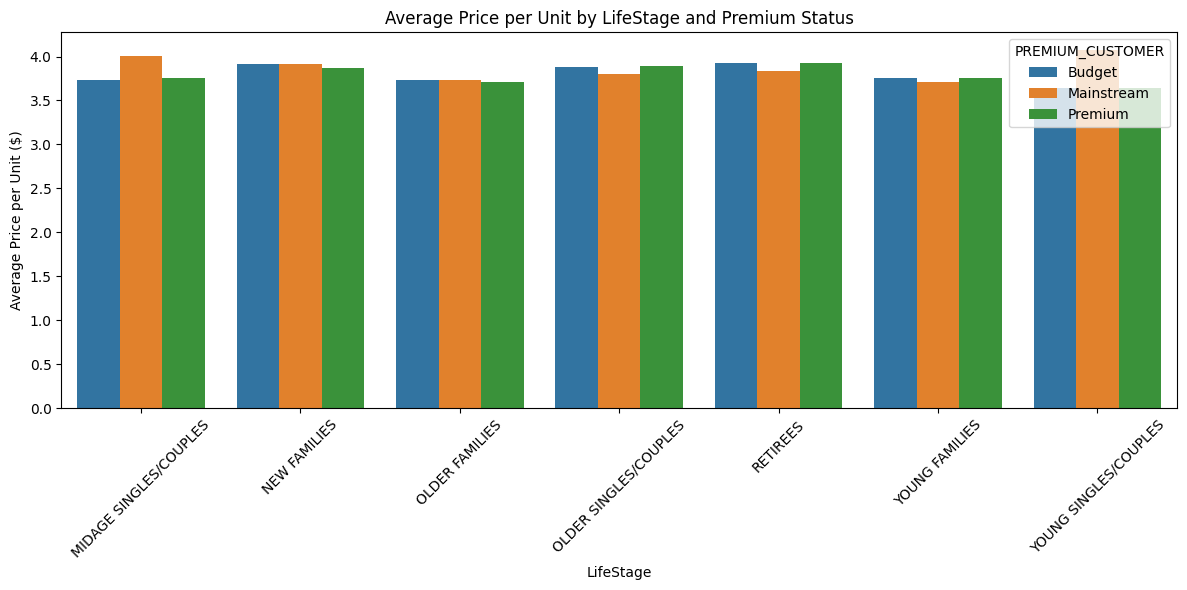

In [ ]:
# Calculate price per unit for each row
Data['PRICE_PER_UNIT'] = Data['TOT_SALES'] / Data['PROD_QTY']

avg_price = Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].mean().reset_index()
avg_price


plt.figure(figsize=(12,6))
sns.barplot(data=avg_price, x='LIFESTAGE', y='PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER')

plt.xticks(rotation=45)
plt.title('Average Price per Unit by LifeStage and Premium Status')
plt.ylabel('Average Price per Unit ($)')
plt.xlabel('LifeStage')
plt.tight_layout()
plt.show()

# Mainstream midage and young singles and couples are more willing to pay more per
# packet of chips compared to their budget and premium counterparts. This may be due
# to premium shoppers being more likely to buy healthy snacks and when they buy
# chips, this is mainly for entertainment purposes rather than their own consumption.
# This is also supported by there being fewer premium midage and young singles and
# couples buying chips compared to their mainstream counterparts.

# As the difference in average price per unit isn't large, we can check if this
# difference is statistically different.


`Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.
As the difference in average price per unit isn’t large, we can check if this difference is statistically different.`

#### Perform an independent t-test between mainstream vs premium and budget midage


In [ ]:
from scipy.stats import ttest_ind
Data['price'] = Data['TOT_SALES'] / Data['PROD_QTY']

# Filter the dataset
young_midage_df = Data[
    Data['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])
]

# Group 1: Mainstream customers
mainstream = young_midage_df[
    young_midage_df['PREMIUM_CUSTOMER'].str.upper() == "MAINSTREAM"
]['price']

# Group 2: Non-Mainstream customers (i.e., Budget or Premium)
non_mainstream = young_midage_df[
    young_midage_df['PREMIUM_CUSTOMER'].str.upper() != "MAINSTREAM"
]['price']

# Welch's t-test (unequal variance)
t_stat, p_value = ttest_ind(mainstream, non_mainstream, equal_var=False, alternative='greater')

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)
print("Mean (Mainstream):", mainstream.mean())
print("Mean (Non-Mainstream):", non_mainstream.mean())


T-statistic: 40.60989476220132
P-value: 0.0
Mean (Mainstream): 4.045586042532388
Mean (Non-Mainstream): 3.688165443861052


`The t-test results in a p-value =0, i.e. the unit price for mainstream, young and mid-age singles and
couples are significantly higher than that of budget or premium, young and midage singles and couples.`

#### Deep dive into Mainstream, young singles/couples

`We might want to target customer segments that contribute the most to sales to retain them or further
increase sales. Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to
buy a particular brand of chips.`

In [ ]:
# Filter the relevant segment
segment_df = Data[
    (Data['LIFESTAGE'].str.upper() == 'YOUNG SINGLES/COUPLES') &
    (Data['PREMIUM_CUSTOMER'].str.upper() == 'MAINSTREAM')
]

# Count brand purchases in the segment
segment_brand_counts = segment_df['BRAND'].value_counts(normalize=True).rename("Segment %")

# Count brand purchases overall
overall_brand_counts = Data['BRAND'].value_counts(normalize=True).rename("Overall %")

# Combine for comparison
brand_affinity = pd.concat([segment_brand_counts, overall_brand_counts], axis=1)

# Compute Affinity Score (ratio of segment % to overall %)
brand_affinity["Affinity Score"] = brand_affinity["Segment %"] / brand_affinity["Overall %"]


# Sort to see top preferred brands
brand_affinity = brand_affinity.sort_values(by="Affinity Score", ascending=False)

print(brand_affinity)


# [INSIGHTS]
# These customers prefer bold, unique flavors (e.g., Mystery, Southern Fried Chicken, Honey, Cheese).

# Doritos, Smiths, and Kettle dominate the list — ideal for targeted promotions or bundling.

            Segment %  Overall %  Affinity Score
BRAND                                           
Tyrrells     0.029683   0.024325        1.220265
Twisties     0.043157   0.035698        1.208958
Tostitos     0.042678   0.035762        1.193379
Kettle       0.184329   0.155901        1.182344
Old          0.041575   0.035207        1.180868
Pringles     0.111010   0.094784        1.171189
Doritos      0.121847   0.106274        1.146536
Cobs         0.041431   0.036600        1.131983
Infuzions    0.059941   0.053622        1.117829
GrnWves      0.030977   0.029226        1.059927
Thins        0.055913   0.053146        1.052045
Cheezels     0.016592   0.017381        0.954596
Smiths       0.095329   0.120162        0.793341
Cheetos      0.007960   0.011052        0.720228
French       0.003740   0.005354        0.698558
RRD          0.046466   0.067133        0.692151
Natural      0.015393   0.022844        0.673805
NCC          0.003501   0.005358        0.653318
CCs          0.01064

`We can see that :
• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population
• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population
Let’s also find out if our target segment tends to buy larger packs of chips.`

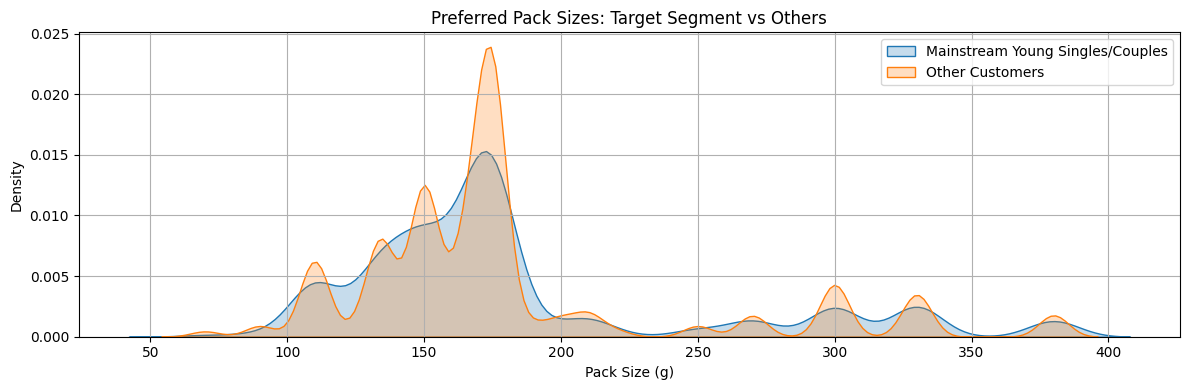

In [ ]:


# Filter the target segment
target_segment = Data[
    (Data['LIFESTAGE'].str.upper().str.contains("YOUNG SINGLES/COUPLES")) &
    (Data['PREMIUM_CUSTOMER'].str.upper() == "MAINSTREAM")
]

# Group the rest of the population
others = Data[
    ~(
        (Data['LIFESTAGE'].str.upper().str.contains("YOUNG SINGLES/COUPLES")) &
        (Data['PREMIUM_CUSTOMER'].str.upper() == "MAINSTREAM")
    )
]

# Plot distribution of PACK_SIZE
plt.figure(figsize=(12,4))
sns.kdeplot(target_segment['PACK_SIZE'], label='Mainstream Young Singles/Couples', fill=True)
sns.kdeplot(others['PACK_SIZE'], label='Other Customers', fill=True)
plt.title("Preferred Pack Sizes: Target Segment vs Others")
plt.xlabel("Pack Size (g)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# [INSIGHTS]
# Both Mainstream Young Singles/Couples (blue) and Other Customers (orange) show a peak density around the 170–180g range —
# indicating that medium-sized packs are the most popular across the board.

# However, the target segment’s distribution is slightly flatter, suggesting a wider variety of pack sizes are purchased compared to other segments.



#### Preferred pack size compared to the rest of the population


In [ ]:
# Total quantity per group
# Target Segment: Mainstream + Young Singles/Couples
segment1 = Data[
    (Data['LIFESTAGE'].str.upper() == 'YOUNG SINGLES/COUPLES') &
    (Data['PREMIUM_CUSTOMER'].str.upper() == 'MAINSTREAM')
]

# All Others
other = Data[
    ~(
        (Data['LIFESTAGE'].str.upper() == 'YOUNG SINGLES/COUPLES') &
        (Data['PREMIUM_CUSTOMER'].str.upper() == 'MAINSTREAM')
    )
]
# Total quantity for normalization
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# For segment1
segment1_by_pack = (
    segment1.groupby('PACK_SIZE')['PROD_QTY'].sum()
    .div(quantity_segment1)
    .reset_index()
    .rename(columns={'PROD_QTY': 'targetSegment'})
)

# For other
other_by_pack = (
    other.groupby('PACK_SIZE')['PROD_QTY'].sum()
    .div(quantity_other)
    .reset_index()
    .rename(columns={'PROD_QTY': 'other'})
)

# Merge the two tables on 'pack size'
pack_proportions = pd.merge(segment1_by_pack, other_by_pack, on='PACK_SIZE')

# Calculate affinity ratio
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']

# Sort by descending affinity
pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)


print(pack_proportions)


    PACK_SIZE  targetSegment     other  affinityToPack
17        270       0.029846  0.023377        1.276694
20        380       0.030156  0.023832        1.265361
19        330       0.057465  0.046727        1.229814
4         134       0.111980  0.093743        1.194536
2         110       0.099658  0.083642        1.191482
14        210       0.027309  0.023401        1.167002
5         135       0.013849  0.012180        1.136997
16        250       0.013460  0.011905        1.130611
9         170       0.075740  0.075440        1.003980
18        300       0.054954  0.057263        0.959679
10        175       0.239102  0.251517        0.950641
6         150       0.155130  0.163446        0.949122
8         165       0.052185  0.058004        0.899681
12        190       0.007015  0.011590        0.605256
11        180       0.003365  0.005651        0.595459
7         160       0.006005  0.011526        0.521046
1          90       0.005954  0.011719        0.508043
3         

`It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.`

In [ ]:
Data[Data['PACK_SIZE'] == 270]['BRAND'].value_counts()

,count
BRAND,
Twisties,6285


`Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.`

'''Let’s recap what we’ve found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.'''

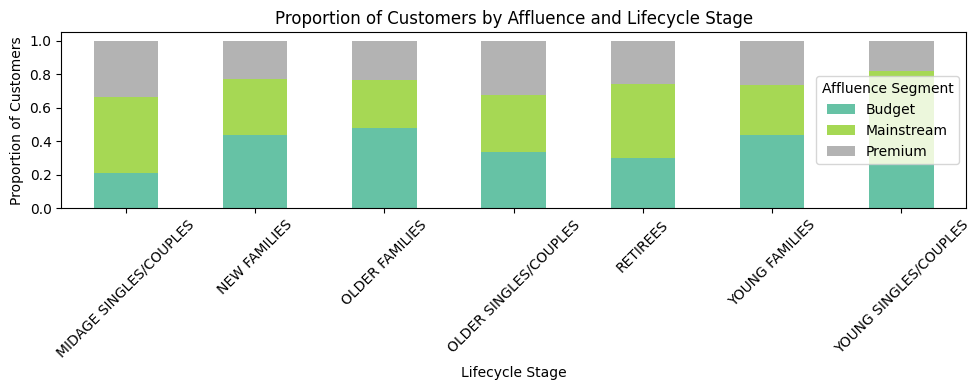

In [ ]:

# Assuming your DataFrame is called 'data' and includes columns 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
# Create a count of customers in each group
customer_counts = Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Pivot to get proportions
pivot_df = customer_counts.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR')

# Normalize to get proportions
proportions = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Plot
proportions.plot(kind='bar', stacked=True, figsize=(10, 4), colormap='Set2')
plt.title('Proportion of Customers by Affluence and Lifecycle Stage')
plt.xlabel('Lifecycle Stage')
plt.ylabel('Proportion of Customers')
plt.legend(title='Affluence Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


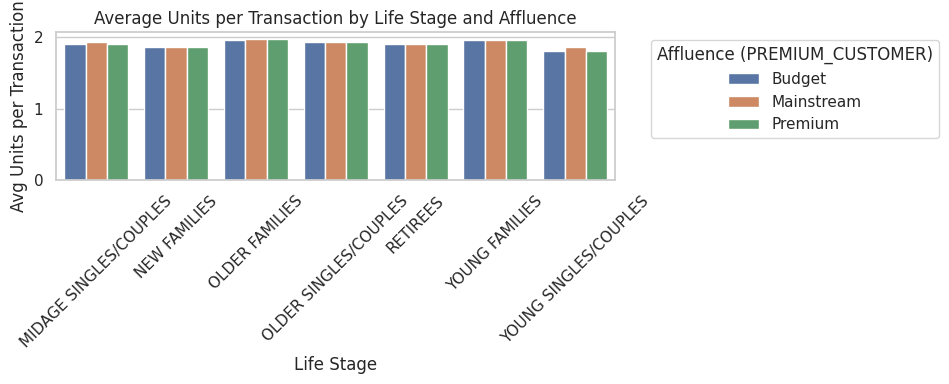

In [ ]:

grouped = Data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).agg({
    'PROD_QTY': 'sum',
    'TXN_ID': pd.Series.nunique
}).reset_index()

# Rename columns
grouped.rename(columns={'PROD_QTY': 'Total_Units', 'TXN_ID': 'Total_Transactions'}, inplace=True)

# Calculate average units per transaction
grouped['Avg_Units_per_Transaction'] = grouped['Total_Units'] / grouped['Total_Transactions']


# Set the figure size and style
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

# Plot with LIFESTAGE on x-axis and PREMIUM_CUSTOMER as hue
sns.barplot(
    data=grouped,
    x='LIFESTAGE',
    y='Avg_Units_per_Transaction',
    hue='PREMIUM_CUSTOMER'
)

# Add plot labels and formatting
plt.title('Average Units per Transaction by Life Stage and Affluence')
plt.xlabel('Life Stage')
plt.ylabel('Avg Units per Transaction')
plt.xticks(rotation=45)
plt.legend(title='Affluence (PREMIUM_CUSTOMER)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
Data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEANED_PROD_NAME,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT,price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream,175,Kettle,YOUNG SINGLES/COUPLES,Premium,5.40,5.40
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime,175,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40,4.40
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana,170,Doritos,YOUNG SINGLES/COUPLES,Premium,4.40,4.40
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno,150,Doritos,YOUNG SINGLES/COUPLES,Premium,3.90,3.90
